# Big Mart Sales Analysis
## Problem Statement:-
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.



###  We will explore the problem in following stages:
1. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
2. Data Cleaning – imputing missing values in the data and checking for outliers
3. Feature Engineering – modifying existing variables and creating new ones for analysis
4. Model Building – making predictive models on the data

### Dataset description
The dataset has 8524 entries with 13 columns.The description of each columns is given below:
1. Item_Identifier - Unique product id.
2. Item _Weight - Weight of product
3. Item_Fat_Content
4. Item_Visibility
5. Item_Type
6. Item_MRP
7. Outlet_identifier
8. Outlet_Establishment_Year
9. Outlet_size
10. Outlet_Type
11. Outlet_Location_type
12. Item_outlet sales

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

<img src="http://simplegoodandtasty.com/sites/default/files/imagecache/blog_img_large/images/blog/bigstock_modern_supermarket_view_4236952.jpg" 
width="50%" height="50%" >

### Import the necessary libraries

In [41]:
#importing the necessary packages to process or plot the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


### Read the csv file with the help of pandas read_csv function

In [42]:
# with the help of pandas read the csv file of Bigmart dataset with their read_csv method and store in dataframe.
df=pd.read_csv('E:/datasets/Big_mart.csv')

### To see the dataset use head function

In [4]:
# using the head function see what is originlly present in the dataset
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


### Shape of the dataset

In [5]:
# shape method gives the shape of dataframe ,as we see 8523 rows with 12 columns.
print " shape of dataset:"
df.shape

 shape of dataset:


(8523, 12)

### Size of the dataset

In [6]:
# size method gives the size of dataframe (like rows*columns)
print " size of dataset:"
df.size

 size of dataset:


102276

### Description of all particular column of the dataset

In [7]:
# descrbe function gives the detailed description of dataframe
df.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


#### Some observations from above:

1. Item_Visibility has a min value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.
2. Outlet_Establishment_Years vary from 1985 to 2009. The values might not be apt in this form. Rather, if we can convert them to how old the particular store is, it should have a better impact on sales.

### To check the null values in the dataset

In [8]:
# to see which column have null values use .isnull() ,as we can see two columns have lots of missing values.
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### To see the  datatypes  or size of columns information of the dataset use .info() 

In [9]:
# info of dataframe wiith their types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


## Let’s explore further using the frequency of different categories in each nominal variable.

In [43]:
#Filter categorical variables
categorical_columns = [x for x in df.dtypes.index if df.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier']]
#Print frequency of categories
for col in categorical_columns:
    print '\nFrequency of Categories for varible %s'%col
    print df[col].value_counts()


Frequency of Categories for varible Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Frequency of Categories for varible Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

F

### By exploring the frequency of columns gives us following observations:

1. Item_Fat_Content: Some of ‘Low Fat’ values mis-coded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’ are mentioned as ‘regular’.
2. Item_Type: Not all categories have substantial numbers. It looks like combining them can give better results. we will do it in feature engineering.
3. Outlet_Type: Supermarket Type2 and Type3 can be combined. But we should check if that’s a good idea before doing it.
 

## Data Cleaning
This step typically involves imputing missing values and treating outliers.

### First cleaning of item fat content
In the item fat content column there are two types of fat are defined one is low fat and regular but these are in different form like lf and reg ,so we have to normalize this.

In [44]:
print " Item Fat content :"
df['Item_Fat_Content']=df['Item_Fat_Content'].map({'LF':'Low Fat',
                                                   'reg':'Regular',
                                                   'low fat':'Low Fat',
                                                   'Low Fat':'Low Fat',
                                                   'Regular':'Regular'})
df['Item_Fat_Content'].value_counts()

 Item Fat content :


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Impute the missing values 
Lets impute the former by the average weight of the particular item. This can be done as:

In [45]:
# fillna method fill the item_weight missing values with their mean value
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())
print "after filling the values count of missing values now:" ,sum(df['Item_Weight'].isnull())

after filling the values count of missing values now: 0


Finding mode of each Outlet_type corresponding to the Outlet_size and then replace that mode to the nan values corresponding to outlet_type

In [46]:
from scipy.stats import mode
df=df.fillna(df.mean())
#Determing the mode for each
outlet_size_mode = df.pivot_table(values=['Outlet_Size'], columns=['Outlet_Type'],aggfunc=lambda x:mode(x).mode[0] )
print 'Mode for each Outlet_Type:'
outlet_size_mode

Mode for each Outlet_Type:


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [47]:
#Get a boolean variable specifying missing Item_Weight values
miss_bool = df['Outlet_Size'].isnull() 

In [48]:
#Impute data and check #missing values before and after imputation to confirm
print '\nOrignal #missing value in Outlet_Size: %d'% sum(miss_bool)


Orignal #missing value in Outlet_Size: 2410


In [49]:
# replace all missing value with mode of outlet_type with outlet_size
df.loc[miss_bool,'Outlet_Size'] = df.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
print "Now missing value count in Outlet size:",sum(df['Outlet_Size'].isnull())

Now missing value count in Outlet size: 0


# Exploratory Data Analysis 

## Why do we need Exploratory Data Analysis (EDA)?
After understanding the dimensions and properties of data, we have to deep dive and explore the data visually. It helps us in understanding the nature of data in terms of distribution of the individual variables/features, finding missing values, relationship with other variables and many other things.

Let’s start with univariate EDA. It involves exploring variables individually. We will try to visualize the continuous variables using histograms and categorical variables using bar plots.

# Univariate Analysis
Uni means one.Univariate means one variable analysis.Univariate analysis explores each variable in a data set. Variables could be either categorical or numerical.There are different statistical and visualization techniques of investigation for each type of variable.The key pointers to the univariate analysis is to find out outliers present in data.

### Item outlet sales
Since our target variable is continuous, we can visualise it by plotting its histogram.
As you can see, it is a right skewd variable and would need some data transformation to treat its skewness.



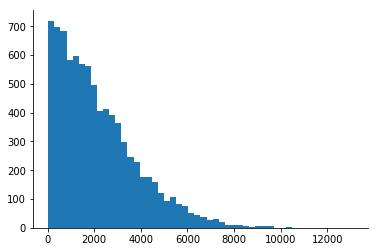

In [18]:
plt.hist(df['Item_Outlet_Sales'],bins=50)
sns.despine()

## Item_Weight
By plottting the count plot of this:
1. we not observe any useful pattern from this histogram plotted b/w item weight and its count.
2. we only notice that item with approx 12 kg wait is high in number.

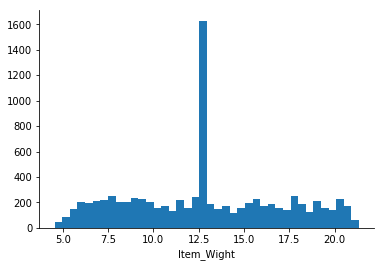

In [19]:
plt.hist(df['Item_Weight'],bins=40)
plt.xlabel('Item_Wight')
sns.despine()

## Independent Variables (numeric variables)
Now let’s check the numeric independent variables. We’ll again use the histograms for visualizations because that will help us in visualizing the distribution of the variables.
### Item_Visibility
1. As we see Item_Visibility is right-skewed and should be transformed to curve its skewness. 
2. We see more number of item have zero visibility which is not possible at all,bcoz if the item is present in store then its visibility  can't be zero.

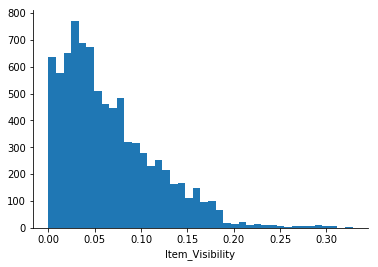

In [20]:
plt.hist(df['Item_Visibility'],bins=40)
plt.xlabel('Item_Visibility')
sns.despine()


### Item_MRP
By plotting histogram of MRP we can notice:
1. There  is a four different patterens of item price we see which will help us in feature processing.
2. we also notice high rate items are less in number .
3. average rate items are more in number .

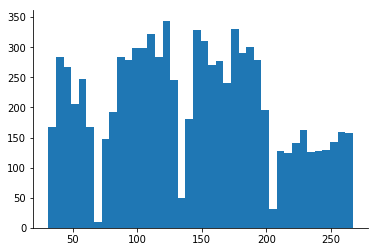

In [21]:
plt.hist(df['Item_MRP'],bins=40)
sns.despine()

## Independent Variables (categorical variables)
Now we’ll try to explore and gain some insights from the categorical variables. A categorical variable or feature can have only a finite set of values. Let’s first plot Item_Fat_Content.

### Item_Fat_Content
As we can oserve by countplot:
1. low fat item are more in number about 7000.
2. regular fat items are lesser in number about 3000.

C:\Users\Dell\Anaconda2\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


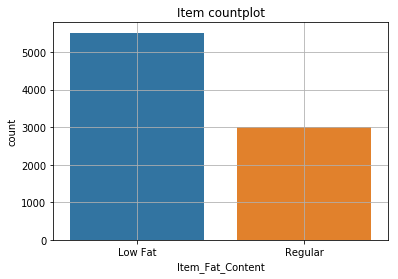

In [22]:
sns.countplot(x='Item_Fat_Content',data=df)
plt.title('Item countplot')
plt.grid()
plt.show()

### Item_Type
by plotting the graph of type of items we can predict that:
1. Fruits and vegetables  and snack foods are more in number bcoz it's demand in society is high.
2. on the other hand seafood is very less in amount.

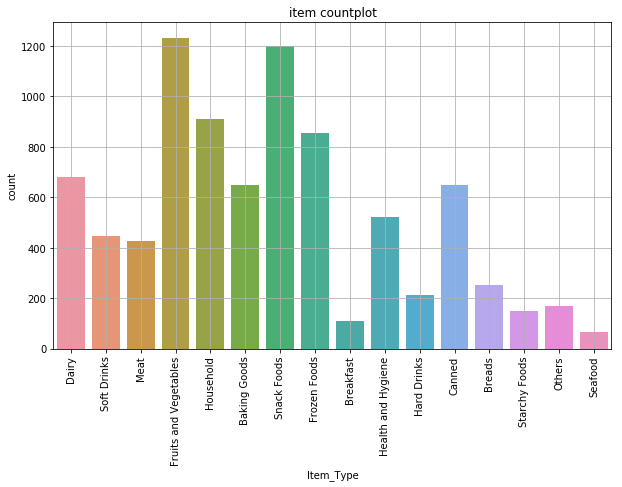

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(x='Item_Type',data=df)
plt.title('item countplot')
plt.grid()

N=16
ind=np.arange(N)
s=(df['Item_Type'].unique())
plt.xticks(ind,s,rotation='90')
plt.show()

### Outlet_Identifier
we can observe:
1. there is no useful pattern extracted for prediction.
2. all the outlet are equal but only the out10 and out19 which have equally amount of items in each other

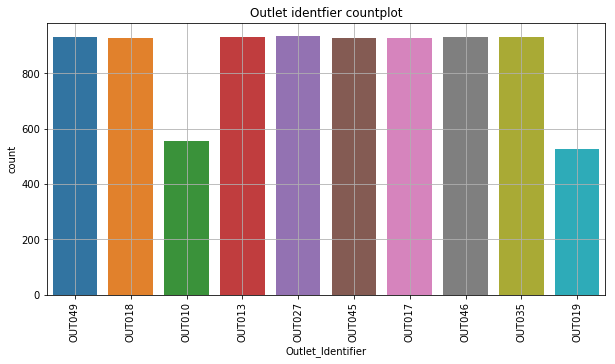

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(x='Outlet_Identifier',data=df)
plt.title('Outlet identfier countplot')
plt.grid()

N=10
ind=np.arange(N)
s=(df['Outlet_Identifier'].unique())
plt.xticks(ind,s,rotation='vertical')
plt.show()

### Outlet_size
By plotting the graph we get:
1. we can see small size outlet are more in number about 4800.
2. we also notice medium size outlet are approx 2800 in number.
3. But the high size outlet ae less in number

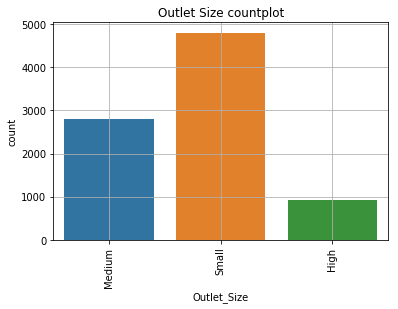

In [25]:
# plt.figure(figsize=(15,8))
sns.countplot(x='Outlet_Size',data=df)
plt.title('Outlet Size countplot')
plt.grid()

N=3
ind=np.arange(N)
s=(df['Outlet_Size'].unique())
plt.xticks(ind,s,rotation='vertical')
plt.show()

### Outlet_Type
By plotting we get:
1. We can see supermarket type 3 is more as compared to other.
2. If we compare other left types then grocery store is high as compared to other supermarkets.
3. Supermarket Type 1 seems to be the most popular category of Outlet_Type.

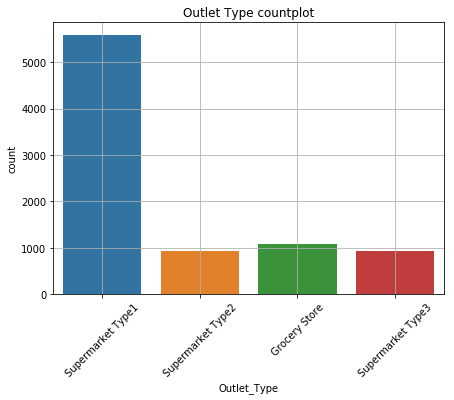

In [26]:
plt.figure(figsize=(7,5))
sns.countplot(x='Outlet_Type',data=df)
plt.title('Outlet Type countplot')
plt.grid()

N=4
ind=np.arange(N)
s=(df['Outlet_Type'].unique())
plt.xticks(ind,s,rotation=45)
plt.show()

### Outlet_Establishment_Year
By plotting bar we get jist of it like:
1. Lesser number of observations in the data for the outlets established in the year 1998 as compared to the other years.
2. higher number of observation in the data for the outlet established year 1999.
3. The oldest store has opened in 1985 and the newest one has opened in 2009. when we look at mean and median,w e can say stores in dataset are generally old stores. (More than 17-18 years old.)

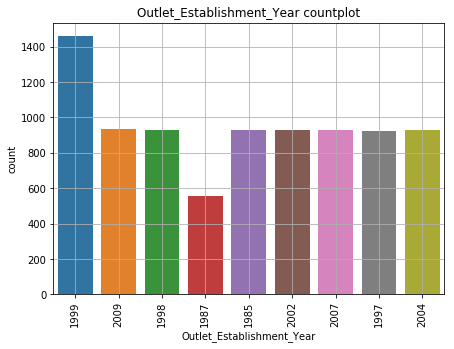

In [27]:
plt.figure(figsize=(7,5))
sns.countplot(x='Outlet_Establishment_Year',data=df)
plt.title('Outlet_Establishment_Year countplot')
plt.grid()

N=9
ind=np.arange(N)
s=(df['Outlet_Establishment_Year'].unique())
plt.xticks(ind,s,rotation='vertical')
plt.show()

### Outlet_Location_Type
By this graph we can observe that
1. The type of city in which the store is located is tells by this tiers.
2. Tier3 type store have more collection of item.

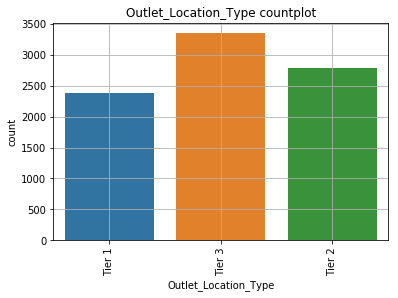

In [28]:
sns.countplot(x='Outlet_Location_Type',data=df)
plt.title('Outlet_Location_Type countplot')
plt.grid()

N=3
ind=np.arange(N)
s=(df['Outlet_Location_Type'].unique())
plt.xticks(ind,s,rotation='vertical')
plt.show()

# Bivariate analysis
Bivariate analysis is the simultaneous analysis of two variables (attributes). It explores the concept of relationship between two variables, whether there exists an association and the strength of this association, or whether there are differences between two variables and the significance of these differences.

After looking at every feature individually, let’s now do some bivariate analysis. Here we’ll explore the independent variables with respect to the target variable. The objective is to discover hidden relationships between the independent variable and the target variable and use those findings in missing data imputation and feature engineering in the next module.

### What is/are the main feature(s) of interest in your dataset?
The Item_Outlet_Sales is our main feature of interest in this dataset.we have to bulid model which can predict their values efficiently.

In [29]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


## Correlation b/w the numerical variables

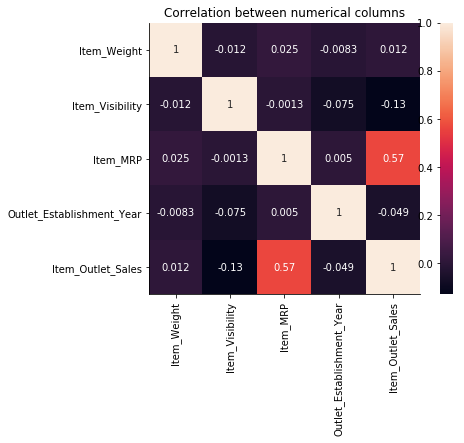

In [30]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),annot=True,square=True)
sns.despine()
plt.title("Correlation between numerical columns")
plt.show()

## Target Variable vs Independent Numerical Variables
Let’s explore the numerical variables first.

### Item Weight v/s item outlet sales
By this scatterplot we observe:
1. NO USEFUL pattern extracted from this .
2. we can say item weight is less importtant for item outlet sales. 
3. Item_Outlet_Sales is spread well across the entire range of the Item_Weight without any obvious pattern.

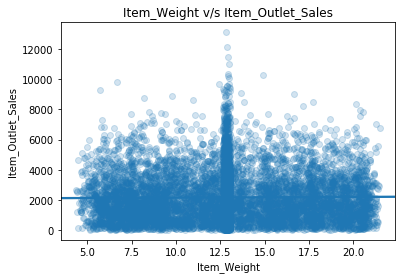

In [31]:
sns.regplot(x='Item_Weight',y='Item_Outlet_Sales',data=df,x_jitter=0.2,scatter_kws={'alpha':0.2})
plt.title("Item_Weight v/s Item_Outlet_Sales")
plt.show()

### Item_visibilty v/s Item outlet sales
1. As we see Item_Visibility is right-skewed and should be transformed to curve its skewness. 
2. We see more number of item have zero visibility which is not possible at all,bcoz if the item is present in store then its visibility  can't be zero.

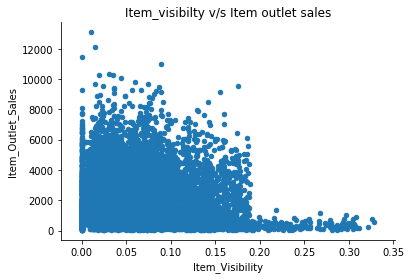

In [32]:
df.plot.scatter(x='Item_Visibility' ,y='Item_Outlet_Sales').set(title='Item_visibilty v/s Item outlet sales',
      xlabel='Item_Visibility',
      ylabel='Item_Outlet_Sales')
sns.despine()

### Item_MRP v/s Item outlet sales
by plotting we get;
1. In the  plot of Item_MRP vs Item_Outlet_Sales, we can clearly see 4 segments of prices that can be used in feature engineering to create a new variable.
2. we can also notice increase in the MRP outlet sales increases.

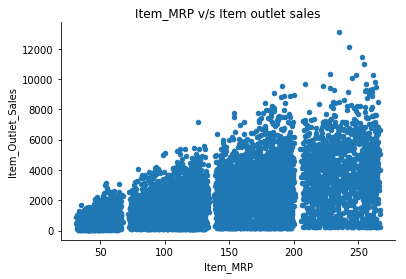

In [33]:
df.plot.scatter(x='Item_MRP' ,y='Item_Outlet_Sales').set(title='Item_MRP v/s Item outlet sales',
      xlabel='Item_MRP',
      ylabel='Item_Outlet_Sales')
sns.despine()

## Target Variable vs Independent Categorical Variables
Now we’ll visualise the categorical variables with respect to Item_Outlet_Sales. We will try to check the distribution of the target variable across all the categories of each of the categorical variable.

We could have used boxplots here

#### Finding the squareroot of item outlet sales column

In [50]:
df['outlet_sales_sqrt']=df['Item_Outlet_Sales'].apply(np.sqrt)

### Item_Type v/s outlet_sales_sqrts
1. Distribution of Item_Outlet_Sales across the categories of Item_Type is not very distinct.


C:\Users\Dell\Anaconda2\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


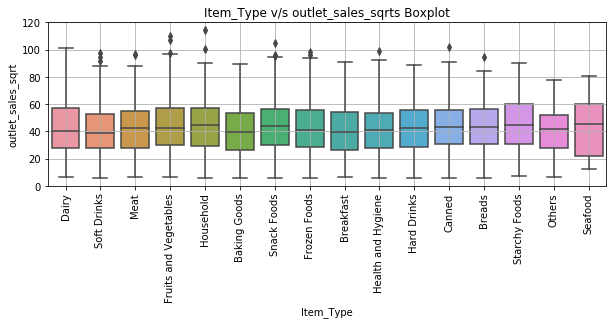

In [35]:
plt.figure(figsize=(10,3))
sns.boxplot(x='Item_Type',y='outlet_sales_sqrt',data=df)
plt.title("Item_Type v/s outlet_sales_sqrts Boxplot")
N=16
ind=np.arange(N)
s=(df['Item_Type'].unique())
plt.xticks(ind,s,rotation='vertical')
plt.grid()
plt.show()

### Oberservation of Target Variable
Observing the histogram of Item Outlet Sales for looking of sales distribution. Also, the histogram of Item Outlet Sales with sqrt, so we can decide which one is more close to normal distribution. As conclusion, we can say SQRT of Item Outlet Sales is much more normal than the others.

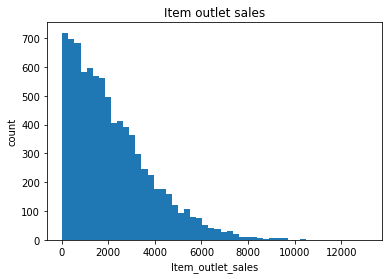

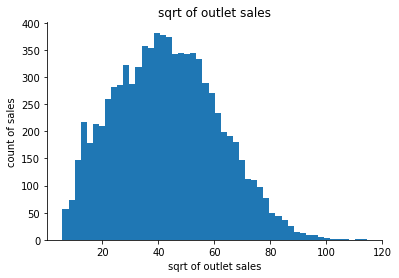

In [36]:
plt.hist(df['Item_Outlet_Sales'],bins=50)
plt.title('Item outlet sales')
plt.xlabel('Item_outlet_sales')
plt.ylabel('count')
plt.show()
plt.hist(df['outlet_sales_sqrt'],bins=50)
plt.title('sqrt of outlet sales')
plt.xlabel('sqrt of outlet sales')
plt.ylabel('count of sales')
sns.despine()

### Outlet_Identifier v/s Item_Outlet_Sales
1. The distribution for OUT010 and OUT019 categories of Outlet_Identifier are quite similar and very much different from the rest of the categories of Outlet_Identifier.

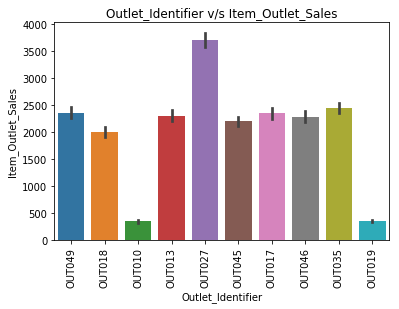

In [37]:
sns.barplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=df)
N=10
ind=np.arange(N)
plt.title("Outlet_Identifier v/s Item_Outlet_Sales")
s=(df['Outlet_Identifier'].unique())
plt.xticks(ind,s,rotation='vertical')
plt.show()

### Item_Fat_Content v/s Item_Outlet_Sales
1. Distribution of Item_Outlet_Sales across the categories of Item_Fat_Content  is not very distinct.

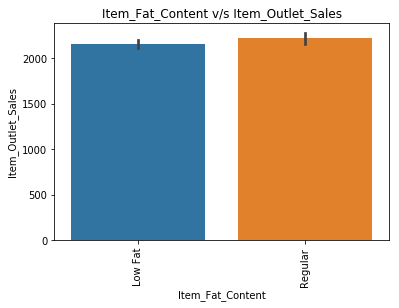

In [38]:
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=df)
N=2
plt.title("Item_Fat_Content v/s Item_Outlet_Sales")
ind=np.arange(N)
s=(df['Item_Fat_Content'].unique())
plt.xticks(ind,s,rotation='vertical')
plt.show()

# Mutivariate Analysis
Multivariate Data Analysis refers to any statistical technique used to analyze data that arises from more than one variable. This essentially models reality where each situation, product, or decision involves more than a single variable.The techniques are especially valuable when working with correlated variables.

## Feature Engineering
### Step 1. Create a broad category of Type of Item
Earlier we saw that the Item_Type variable has 16 categories which might prove to be very useful in analysis. So its a good idea to combine them. One way could be to manually assign a new category to each. But there’s a catch here. If you look at the Item_Identifier, i.e. the unique ID of each item, it starts with either FD, DR or NC. If you see the categories, these look like being Food, Drinks and Non-Consumables. So I’ve used the Item_Identifier variable to create a new column:

In [51]:
#Get the first two characters of ID:
df['Item_Type_Combined'] = df['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
df['Item_Type_Combined'] = df['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
df['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

## Relationship between Item Type/Item Identifier and Outlet_Identifier column
Looking at Item type and Item Identifier because we observed there is a correlation between these two columns and we manipulated Item_Identifier_Content column as IItem_Type_Combined according to Item_Type data. (For example; if Item_Type = “Soft Drinks”, then Item_Type_Combined starts with ‘DR’ .) As you can see on graph; manipulated Item_Type_Combined column is correct and clear now. So output graph shows; DR (Drink) Idenfier has 3 types of item contents while FD(Food) Identifier has 11 types and NC (Non-Consumable) Identifier has 3 types of item contents. Additionally, we can see “Dairy” type is in both DR and FD. Furthermore; “Soft Drinks” consists the most number of items in “DR” Identifier, “Fruit and Vegetables” in “FD” Indetifier and “Household” in “NC” Identifier.

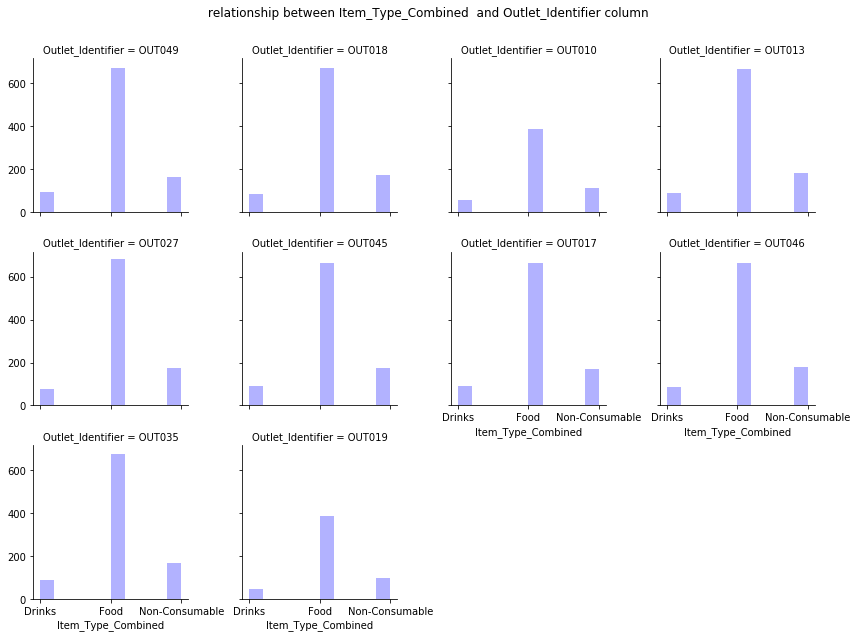

In [40]:
grid=sns.FacetGrid(df,col='Outlet_Identifier',col_wrap=4)
grid.map(plt.hist,'Item_Type_Combined',alpha=0.3,color='b')
plt.subplots_adjust(top=0.9)
grid.fig.suptitle(' relationship between Item_Type_Combined  and Outlet_Identifier column ')
plt.show()

### Relationship between Item Type/Item Identifier and Outlet_sales_sqrt column
We take the sqrt of item outles sales created box plots for each item type to show the relationship. The variation of Snack Foods sales is significantly higher than other types. We assume that since Seafood has more types of items varying from luxury to cost-effective compared to other item types.

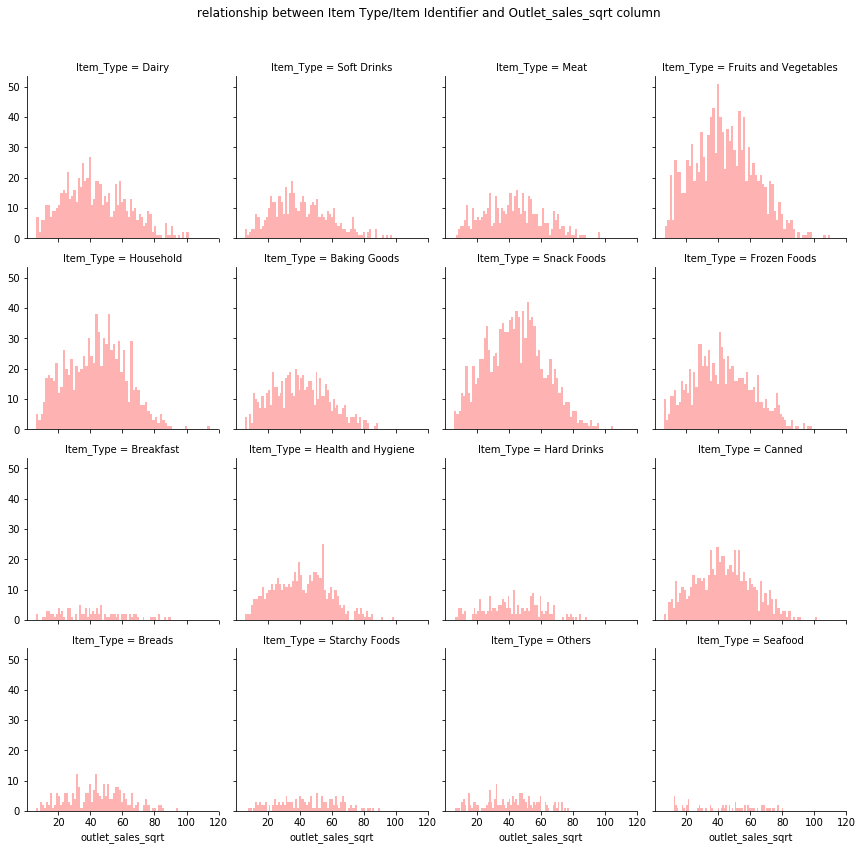

In [41]:
grid=sns.FacetGrid(df,col='Item_Type',col_wrap=4)
grid.map(plt.hist,'outlet_sales_sqrt',alpha=0.3,color='r',bins=70)
plt.subplots_adjust(top=0.9)
grid.fig.suptitle(' relationship between Item Type/Item Identifier and Outlet_sales_sqrt column ')
plt.show()

In [19]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,outlet_sales_sqrt,Item_Type_Combined
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,61.115775,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,21.057607,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,45.795961,Food
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,27.062520,Food
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,31.538947,Non-Consumable


### Relationship Between Outlet_Sales and outlet identifier based on the outlet type
We investigated the relationship between Outlet Sales and Outlet Identifier by plotting a box plot. It is clearly noticeable that the distributions are grouped according to Outlet Types. The means of outlet types lying in the same group are similar.

C:\Users\Dell\Anaconda2\lib\site-packages\seaborn\categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


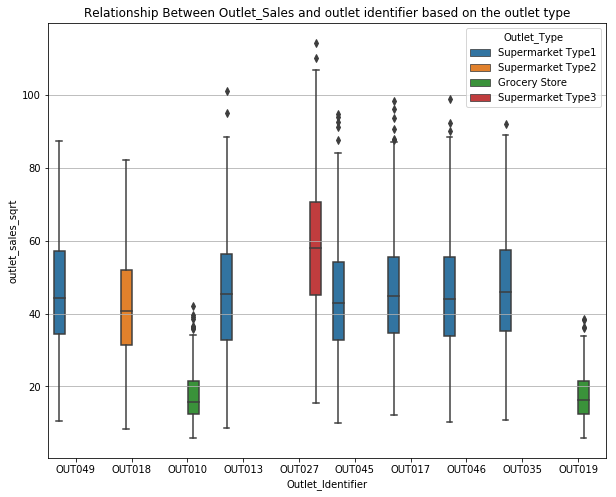

In [43]:
plt.figure(figsize=(10,8))
plt.grid()
plt.title('Relationship Between Outlet_Sales and outlet identifier based on the outlet type')
sns.boxplot(x='Outlet_Identifier',y='outlet_sales_sqrt',data=df,hue='Outlet_Type')

## Feature Preprocessing
Most of the times, the given features in a dataset are not sufficient to give satisfactory predictions. In such cases, we have to create new features which might help in improving the model’s performance. Let’s try to create some new features for our dataset.

### Step 2. Modify Item_Visibility
We noticed that the minimum value here is 0, which makes no practical sense.

In [52]:
df['Item_Visibility'].replace(0,np.NaN,inplace=True)
df['Item_Visibility']=df['Item_Visibility'].fillna(df['Item_Visibility'].mean())
# df.groupby('Item_Identifier').transform(lambda x: x.fillna(x.mean()))

### Step 3. Modify Outlet_Establishment_Year

In [53]:
#Years:
# 2013 bcoz it is given in the problem statement
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']
df['Outlet_Years'].describe()

count    8523.000000
mean       15.168133
std         8.371760
min         4.000000
25%         9.000000
50%        14.000000
75%        26.000000
max        28.000000
Name: Outlet_Years, dtype: float64

As we predict from the above that all the outlet are of 4-28 yrs old.

### Step 4. Modify categories of Item_Fat_Content
In step 1 we saw there were some non-consumables as well and a fat-content should not be specified for them. So we can also create a separate category for such kind of observations.

In [54]:
#Mark non-consumables as separate category in low_fat:
df.loc[df['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

## LabelEncoding 
 I wanted Outlet_Identifier as a variable as well. So I created a new variable ‘Outlet’ same as Outlet_Identifier and coded that. Outlet_Identifier should remain as it is, 

In [55]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])

### change the categorical variables into numeric by the use of GET-DUMMIES 

In [56]:
df = pd.get_dummies(df, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 36 columns):
Item_Identifier                      8523 non-null object
Item_Weight                          8523 non-null float64
Item_Visibility                      8523 non-null float64
Item_Type                            8523 non-null object
Item_MRP                             8523 non-null float64
Outlet_Identifier                    8523 non-null object
Outlet_Establishment_Year            8523 non-null int64
Item_Outlet_Sales                    8523 non-null float64
outlet_sales_sqrt                    8523 non-null float64
Outlet_Years                         8523 non-null int64
Item_Fat_Content_Low Fat             8523 non-null uint8
Item_Fat_Content_Non-Edible          8523 non-null uint8
Item_Fat_Content_Regular             8523 non-null uint8
Outlet_Location_Type_Tier 1          8523 non-null uint8
Outlet_Location_Type_Tier 2          8523 non-null uint8
Outlet_Location_Type_Tier

In [23]:
df[['Item_Fat_Content_Low Fat','Item_Fat_Content_Non-Edible','Item_Fat_Content_Regular']].head(10)

,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
5,0,0,1
6,0,0,1
7,1,0,0
8,0,0,1
9,0,0,1


### Drop the columns which have been converted to different types:

In [58]:
#Drop the columns which have been converted to different types:
df.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#### In the below code we do.

1. We have split our data into training and testing sets, and now is finally the time to train our algorithm.
2. Then as we know are Item_Identifier, Outlet_Identifier column have string type whih is to be drop bcoz there are not useful features 
3. The target variable item outlet sales is stored in the dataset.
4. we train the model 70% of data (x_train,y_train),and 30% test data(x_test,y_test).

In [59]:
X=df.drop(['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales','outlet_sales_sqrt'],axis=1)
Y=df['Item_Outlet_Sales']

In [60]:
from sklearn.cross_validation import train_test_split

In [61]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.40,random_state=42)

## LinearRegression
The term ”linearity” in algebra refers to a linear relationship between two or more variables. If we draw this relationship in a two dimensional space (between two variables, in this case), we get a straight line.

1. We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [62]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()

In [63]:
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Accuracy

In [64]:
print "score:"
lreg_score=lreg.score(x_test,y_test)
print lreg_score

score:
0.5684929833502714


### Evaluation

In [65]:
lreg_predict=lreg.predict(x_test)

In [66]:
from sklearn import metrics

In [67]:
MAE=metrics.mean_absolute_error(y_test,lreg_predict)
print " MAE:",MAE
MSE=metrics.mean_squared_error(y_test,lreg_predict)
print"MSE:",MSE
RMSE=np.sqrt(metrics.mean_squared_error(y_test,lreg_predict))
print "RMSE:",RMSE

 MAE: 814.8585861916275
MSE: 1207176.2476219288
RMSE: 1098.7157264833925


# RandomForestRegressor
A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. 

In [68]:
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor


In [69]:
regr = RandomForestRegressor()
regr.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### Accuracy

In [70]:
regr_score=regr.score(x_test,y_test)

### Evaluation

In [71]:
regr_predict=regr.predict(x_test)

In [72]:
from sklearn import metrics

In [73]:
MAE=metrics.mean_absolute_error(y_test,regr_predict)
print " MAE:",MAE
MSE=metrics.mean_squared_error(y_test,regr_predict)
print"MSE:",MSE
RMSE=np.sqrt(metrics.mean_squared_error(y_test,regr_predict))
print "RMSE:",RMSE

 MAE: 799.2297759120233
MSE: 1314685.4041256646
RMSE: 1146.5973155932577


### Use GridSearchCV to find the best parameter for RandomforestRegressor 

In [74]:
from sklearn.model_selection import GridSearchCV

In [78]:
grid_para={'n_estimators':[50,100,150,200,500],'max_depth':[2,4,5,6,7,8]}

In [79]:
gsc=GridSearchCV(RandomForestRegressor(),grid_para)
gsc.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 100, 150, 200, 500], 'max_depth': [2, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

### Best_Parameter

In [80]:
gsc.best_params_

{'max_depth': 5, 'n_estimators': 150}

    Now by fitting the best parameter in  RandomForestRegressor and then find the score

In [81]:
grid_rbgr=RandomForestRegressor(max_depth= 5, n_estimators= 150)

In [82]:
grid_rbgr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

#### Accuracy by the best parameter

In [83]:
grid_rbgr_score=grid_rbgr.score(x_test,y_test)
print grid_rbgr_score

0.6004567518000168


# GradientBoostingRegressor
GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

In [84]:
from sklearn.ensemble import GradientBoostingRegressor,BaggingRegressor

In [75]:
# gbr=GradientBoostingRegressor(learning_rate=0.01, n_estimators=600,max_depth=9, min_samples_split=1200,min_samples_leaf=60, subsample=0.85, random_state=10, max_features=7)

In [85]:
gbr=GradientBoostingRegressor()

In [86]:
gbr.fit(x_train,y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

### Accuracy

In [87]:
gbr_score=gbr.score(x_test,y_test)
print gbr_score

0.5947041871615917


### Evaluation

In [88]:
gbr_predict=gbr.predict(x_test)

In [89]:
from sklearn import metrics

In [90]:
MAE=metrics.mean_absolute_error(y_test,gbr_predict)
print " MAE:",MAE
MSE=metrics.mean_squared_error(y_test,gbr_predict)
print"MSE:",MSE
RMSE=np.sqrt(metrics.mean_squared_error(y_test,gbr_predict))
print "RMSE:",RMSE

 MAE: 740.8235344566173
MSE: 1133848.2565540855
RMSE: 1064.8231104526637


We can see we can't get better results.to get better result we use gridsearchcv

### Use GridSearchCV to find the best parameter for GradientBoostingRegressor 

In [91]:
grid_para={'n_estimators':[10,50,100,500,1000]}

In [92]:
gsc=GridSearchCV(GradientBoostingRegressor(),grid_para)
gsc.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

### Best parameters for gradienboostingregressor

In [93]:
gsc.best_params_

{'n_estimators': 50}

In [94]:
gbr_grid=GradientBoostingRegressor( n_estimators=50)
gbr_grid.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

#### Accuracy by best parameter

In [95]:
grid_gbr_score=gbr_grid.score(x_test,y_test)
print grid_gbr_score

0.6008661380168223


# DecisionTreeRegressor

In [96]:
from sklearn.tree import DecisionTreeRegressor
alg3 = DecisionTreeRegressor()

In [97]:
alg3.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### Accuracy

In [98]:
alg3_score=alg3.score(x_test,y_test)
print alg3_score

0.17832887597312275


### Evaluation 

In [99]:
alg3_predict=alg3.predict(x_test)

In [100]:
from sklearn import metrics


In [101]:
MAE=metrics.mean_absolute_error(y_test,alg3_predict)
print " MAE:",MAE
MSE=metrics.mean_squared_error(y_test,alg3_predict)
print"MSE:",MSE
RMSE=np.sqrt(metrics.mean_squared_error(y_test,alg3_predict))
print "RMSE:",RMSE

 MAE: 1052.226024516129
MSE: 2298692.3178753885
RMSE: 1516.1438974831474


### Use GridSearchCV to find the best parameter for DecisionTreeRegressor

In [102]:
from sklearn.model_selection import GridSearchCV

In [103]:
grid_para={'min_samples_leaf':[50,100,150,200,500],'max_depth':[2,18,10,15,20]}
gsc=GridSearchCV(DecisionTreeRegressor(),grid_para)
gsc.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 18, 10, 15, 20], 'min_samples_leaf': [50, 100, 150, 200, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

### Best parameter

In [104]:
gsc.best_params_

{'max_depth': 18, 'min_samples_leaf': 50}

In [105]:
dec_grid=DecisionTreeRegressor( max_depth=18, min_samples_leaf=50)
dec_grid.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=18, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=50,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

#### Accuracy by best parameter

In [106]:
grid_dec_score=dec_grid.score(x_test,y_test)
print grid_dec_score

0.5851954475427961


## BaggingRegressor


In [107]:
from sklearn.ensemble import BaggingRegressor

In [108]:
bag=BaggingRegressor()

In [109]:
bag.fit(x_train,y_train)

BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

### Accuracy and Evaluation

In [113]:
bag_score=bag.score(x_test,y_test)
print bag_score

0.5149362994646353


In [110]:
bag_predict=bag.predict(x_test)


In [111]:
from sklearn import metrics
MAE=metrics.mean_absolute_error(y_test,bag_predict)
print " MAE:",MAE
MSE=metrics.mean_squared_error(y_test,bag_predict)
print"MSE:",MSE
RMSE=np.sqrt(metrics.mean_squared_error(y_test,bag_predict))
print "RMSE:",RMSE

 MAE: 808.3192540821115
MSE: 1357005.4605744893
RMSE: 1164.9057732600047


## Comparison of different Models

#### Comparing Accuracy of different models

In [116]:
model=['linear Regressor','RandomForestRegressor','GradientBostingRegressor','DecisionTreeRegressor','BaggingRegressor']
score=[lreg_score,grid_rbgr_score,grid_gbr_score,grid_dec_score,bag_score]
predict=[lreg_predict,regr_predict,gbr_predict,alg3_predict,bag_predict]
compare=pd.DataFrame({'Model':model,'Score':score},index=[i for i in range(1,6)])

In [118]:
compare.T

,1,2,3,4,5
Model,linear Regressor,RandomForestRegressor,GradientBostingRegressor,DecisionTreeRegressor,BaggingRegressor
Score,0.568493,0.600457,0.600866,0.585195,0.514936


C:\Users\Dell\Anaconda2\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


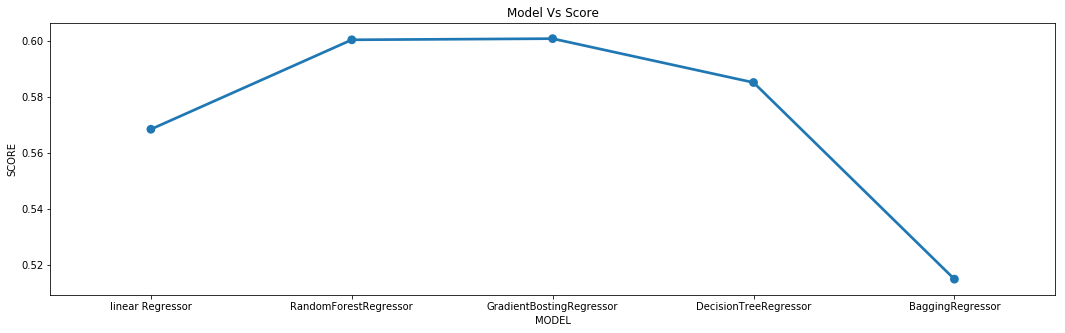

In [119]:
plt.figure(figsize=(18,5))
sns.pointplot(x='Model',y='Score',data=compare)
plt.title('Model Vs Score')
plt.xlabel('MODEL')
plt.ylabel('SCORE')
plt.show()

### Inferences-
We can notice that the accuracy score of the random forest regressor is maximum(around 86%).The accuracy score of random forest classifier using entropy criterion and bagging classifer are almost same (around 84%).And for voting classifier accuracy score is around 85%. The accuracy score of support vector machine using sigmoid kernel is minimum (around 75%).

## Conclusion
we moved on to data exploration where we found out some nuances in the data which required remediation. Next, we performed data cleaning and feature engineering, where we imputed missing values and solved other irregularities, made new features and also made the data model-friendly by label-encoding. Finally we made regression, decision tree and random forest model and got a glimpse of how to tune them for better results.
By making different types of models we reach the conclusion that gradientboosting regressor is better than all models as this gives 60% accuracy  which is better than others.

